### **Required Libraries**

In [1]:
pip install spacy

  Using cached numpy-2.2.4-cp312-cp312-win_amd64.whl.metadata (60 kB)
   ---------------------------------------- 0.0/11.8 MB ? eta -:--:--
    --------------------------------------- 0.3/11.8 MB ? eta -:--:--
   ---- ----------------------------------- 1.3/11.8 MB 4.8 MB/s eta 0:00:03
   ------ --------------------------------- 1.8/11.8 MB 4.2 MB/s eta 0:00:03
   -------- ------------------------------- 2.6/11.8 MB 4.0 MB/s eta 0:00:03
   ------------ --------------------------- 3.7/11.8 MB 4.0 MB/s eta 0:00:03
   -------------- ------------------------- 4.2/11.8 MB 4.0 MB/s eta 0:00:02
   ---------------- ----------------------- 5.0/11.8 MB 3.9 MB/s eta 0:00:02
   -------------------- ------------------- 6.0/11.8 MB 3.9 MB/s eta 0:00:02
   ---------------------- ----------------- 6.6/11.8 MB 3.9 MB/s eta 0:00:02
   ------------------------ --------------- 7.3/11.8 MB 3.8 MB/s eta 0:00:02
   ---------------------------- ----------- 8.4/11.8 MB 3.9 MB/s eta 0:00:01
   -----------------

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
contourpy 1.2.0 requires numpy<2.0,>=1.20, but you have numpy 2.2.4 which is incompatible.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.2.4 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.4 which is incompatible.
tensorflow-intel 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.4 which is incompatible.


In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import spacy
import nltk
import tensorflow as tf
from tensorflow import keras
from bs4 import BeautifulSoup
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
from imblearn.combine import SMOTETomek
from wordcloud import WordCloud
from warnings import filterwarnings

filterwarnings('ignore')

In [3]:
# NLTK
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Pranita
[nltk_data]     Kumbhar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

### **Data Collection**

In [6]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Extract the Data from Zip File

data = '/content/drive/MyDrive/Project/FinacPlus_Task/data.zip'

!unzip $data -d /content/task

### **Data Preprocessing**

In [4]:
def text_extract_from_html(html_file):

    # Open and Read the HTML File
    with open(file=html_file, mode='r', encoding='utf-8') as file:
        html_content = file.read()

    # Parse the HTML Content
    soup = BeautifulSoup(html_content, 'html.parser')

    # Extract the Text
    text = soup.get_text()

    # Split the Text and Remove Unwanted Space
    result = [i.strip() for i in text.split()]

    return result

In [5]:
# Extract Text from All HTML Documents

file_name = []
extracted_text = []
target = []

for folder_name in os.listdir('dataset'):

    # Make a Target_Folder Path
    path = os.path.join('dataset', folder_name)

    for html_file in os.listdir(path):

        # Verify the File as HTML_File or not
        if html_file.endswith('.html'):

            # Make a HTML File Path
            html_file_path = os.path.join('dataset', folder_name, html_file)

            # Extract the Text from HTML Document
            result = text_extract_from_html(html_file_path)

            # Append the Data into List
            file_name.append(html_file)
            extracted_text.append(result)
            target.append(folder_name)

In [6]:
# Number of Total Documents
len(file_name), len(extracted_text), len(target)

(2525, 2525, 2525)

In [7]:
df = pd.DataFrame({'file_name':file_name, 'text':extracted_text, 'target':target})
df

,file_name,text,target
0,18320959_3.html,"[(7, in, lacs), (7, in, lacs), _1_, Standalone...",Balance Sheets
1,18391125_2.html,"[Consolidated, Standalone, Particulars, As, at...",Balance Sheets
2,18442877_5.html,"[Standalone, Consolidated, Audited, Audited, P...",Balance Sheets
3,18445487_2.html,"[GUJARAT, NARMADA, VALLEY, FERTILIZERS, &, CHE...",Balance Sheets
4,18445494_3.html,"[Standalone, Consolidated, As, at, As, at, As,...",Balance Sheets
...,...,...,...
2520,18964858_6.html,"[1., Singhi, &, Co.,, 2., Chatterjee, &, Co.,,...",Others
2521,18964858_7.html,"[Singhi, &, Co., Chatterjee, &Co., V.K., Dhing...",Others
2522,18964858_8.html,"[r*, •, •, *“•"", 1, 1, i, •, •, 1, 1, 1, STEEL...",Others
2523,19213523_4.html,"[Particulars, Quarter, ended, Year, ended, Mar...",Others


In [8]:
# spaCy Engine

nlp = spacy.load('en_core_web_lg')

In [9]:
def text_processing(text):

    # Process the Text with spaCy
    doc = nlp(' '.join(text))

    # Tokenization, Lemmatization, and Remove Stopwords, punctuation, digits
    token_list = [
                  token.lemma_.lower().strip()
                  for token in doc
                  if token.text.lower() not in nlp.Defaults.stop_words and token.text.isalpha()
                 ]

    if len(token_list) > 0:
        return ' '.join(token_list)
    else:
        return 'empty'

In [10]:
df['text'] = df['text'].apply(text_processing)

In [11]:
df

,file_name,text,target
0,18320959_3.html,lac lac standalone consolidated sr particular ...,Balance Sheets
1,18391125_2.html,consolidated standalone particulars assets non...,Balance Sheets
2,18442877_5.html,standalone consolidated audited audited partic...,Balance Sheets
3,18445487_2.html,gujarat narmada valley fertilizer chemicals li...,Balance Sheets
4,18445494_3.html,standalone consolidated particular equity liab...,Balance Sheets
...,...,...,...
2520,18964858_6.html,singhi chatterjee dhingra chartered chartered ...,Others
2521,18964858_7.html,singhi chatterjee dhingra chartered chartered ...,Others
2522,18964858_8.html,r steel authority india limitedcin registered ...,Others
2523,19213523_4.html,particulars quarter end year end march refer n...,Others


In [12]:
# Save the DataFrame into CSV File

df.to_csv('df.csv', index=False)

In [13]:
# Read the CSV File

df = pd.read_csv('df.csv')
df

,file_name,text,target
0,18320959_3.html,lac lac standalone consolidated sr particular ...,Balance Sheets
1,18391125_2.html,consolidated standalone particulars assets non...,Balance Sheets
2,18442877_5.html,standalone consolidated audited audited partic...,Balance Sheets
3,18445487_2.html,gujarat narmada valley fertilizer chemicals li...,Balance Sheets
4,18445494_3.html,standalone consolidated particular equity liab...,Balance Sheets
...,...,...,...
2520,18964858_6.html,singhi chatterjee dhingra chartered chartered ...,Others
2521,18964858_7.html,singhi chatterjee dhingra chartered chartered ...,Others
2522,18964858_8.html,r steel authority india limitedcin registered ...,Others
2523,19213523_4.html,particulars quarter end year end march refer n...,Others


In [14]:
df['target'].value_counts()

target
Others              1224
Notes                690
Income Statement     305
Balance Sheets       270
Cash Flow             36
Name: count, dtype: int64

In [15]:
# Text Data Visualization using Word Cloud

def word_cloud(target_category):

    # Filter the Dataframe based on Category
    df1 = df[df['target']==target_category]

    # Join the Text Data into Single Sentence
    text = ' '.join(df1['text'].tolist())

    # Sentence Passing to the WordCloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    return wordcloud

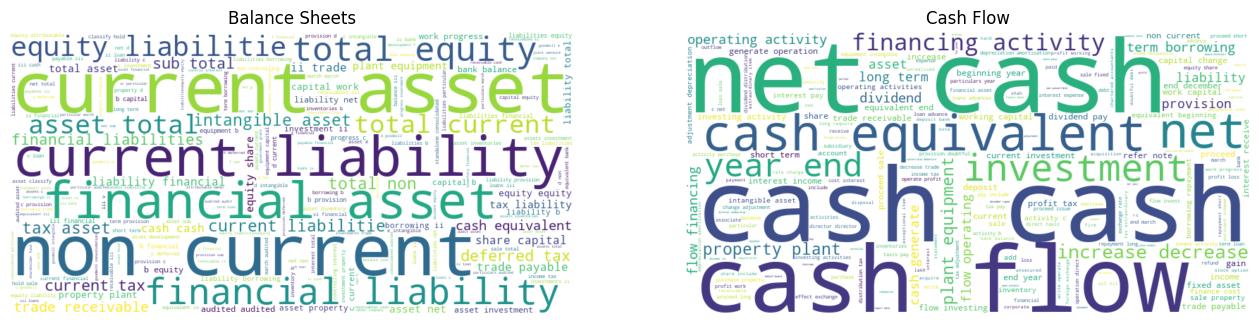

In [16]:
plt.figure(figsize=(16,8))

plt.subplot(1, 2, 1)
img_1 = word_cloud('Balance Sheets')
plt.imshow(img_1, interpolation='bilinear')
plt.axis('off')
plt.title('Balance Sheets')

plt.subplot(1, 2, 2)
img_2 = word_cloud('Cash Flow')
plt.imshow(img_2, interpolation='bilinear')
plt.axis('off')
plt.title('Cash Flow')
plt.show()

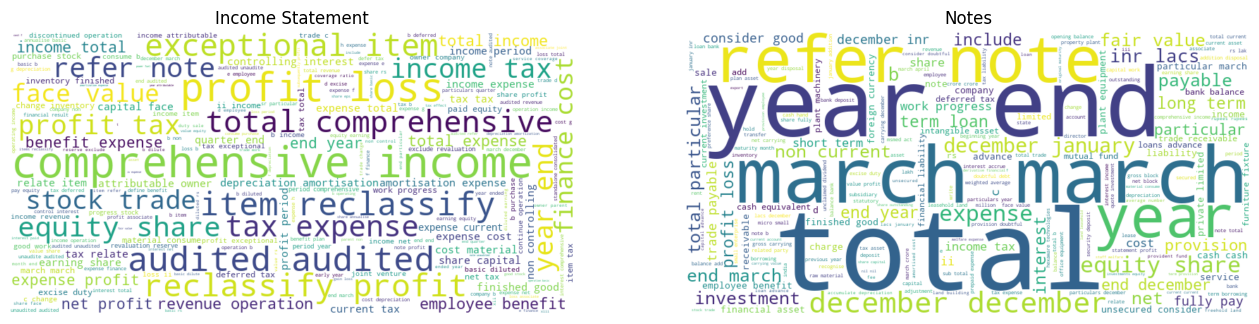

In [17]:
plt.figure(figsize=(16,8))

plt.subplot(1, 2, 1)
img_1 = word_cloud('Income Statement')
plt.imshow(img_1, interpolation='bilinear')
plt.axis('off')
plt.title('Income Statement')

plt.subplot(1, 2, 2)
img_2 = word_cloud('Notes')
plt.imshow(img_2, interpolation='bilinear')
plt.axis('off')
plt.title('Notes')
plt.show()

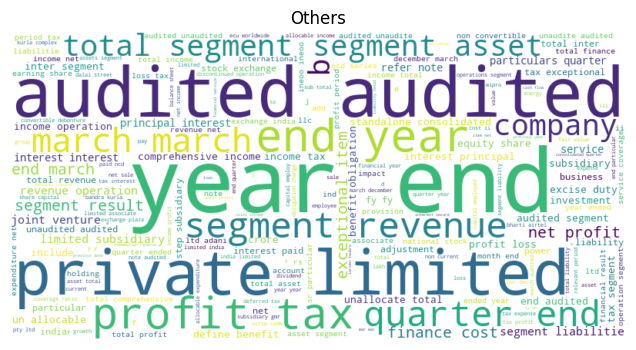

In [18]:
plt.figure(figsize=(8, 4))

img_1 = word_cloud('Others')
plt.imshow(img_1, interpolation='bilinear')
plt.axis('off')
plt.title('Others')
plt.show()

In [19]:
# Tokenize the preprocessed sentences

tokenized_sentence = []

# Iterate the each Sentence from the Dataframe
for sentence in df['text']:

    # Sentence Split into Tokens
    token_list = []
    for token in word_tokenize(sentence):

        # Verify the Duplicates
        if token not in token_list:
            token_list.append(token)

    # Append the Tokens_list and empty it
    tokenized_sentence.append(token_list)
    token_list = []

In [20]:
print(len(tokenized_sentence))
print(tokenized_sentence[0:2])

2525
[['lac', 'standalone', 'consolidated', 'sr', 'particular', 'assets', 'non', 'current', 'property', 'plant', 'equipment', 'b', 'capital', 'work', 'progress', 'c', 'intangible', 'asset', 'd', 'financial', 'investment', 'ii', 'loans', 'iii', 'e', 'total', 'inventories', 'trade', 'receivables', 'cash', 'equivalent', 'bank', 'balance', 'ivj', 'v', 'equity', 'liabilities', 'share', 'long', 'term', 'borrowing', 'liability', 'bj', 'provision', 'deferred', 'tax', 'net', 'short', 'payable'], ['consolidated', 'standalone', 'particulars', 'assets', 'non', 'current', 'asset', 'property', 'plant', 'equipment', 'capital', 'work', 'progress', 'goodwill', 'intangible', 'development', 'financial', 'investments', 'b', 'loans', 'c', 'defer', 'tax', 'net', 'income', 'total', 'inventory', 'trade', 'receivables', 'cash', 'equivalent', 'd', 'bank', 'balance', 'e', 'loan', 'f', 'equity', 'liabilities', 'share', 'attributable', 'shareholder', 'company', 'controlling', 'interest', 'liability', 'borrowing', 

In [21]:
# Train Word2Vec model

model = Word2Vec(sentences=tokenized_sentence, vector_size=300, window=5, min_count=1)
model

In [22]:
model.wv['profit']

array([-1.15625516e-01,  5.40426612e-01,  2.98006982e-01,  4.83338356e-01,
       -2.51613647e-01, -4.36229825e-01,  5.29056728e-01,  5.30846834e-01,
       -2.82611161e-01, -1.69078097e-01, -1.44478781e-02, -2.56121773e-02,
       -4.09853250e-01,  1.49396941e-01, -4.40562695e-01, -1.04794241e-01,
        2.64035970e-01,  2.02477872e-01, -1.88098550e-01, -1.19985402e+00,
       -2.79892683e-02,  4.58464861e-01,  1.33082926e-01, -1.38412610e-01,
        7.48601630e-02,  1.67987764e-01, -3.65213394e-01, -4.57852334e-01,
       -5.09099364e-01, -7.83572674e-01,  1.12999864e-02,  3.01555991e-01,
        3.47469635e-02, -2.94880718e-02, -4.78982985e-01,  5.39983928e-01,
        8.31718028e-01,  1.35736968e-02, -3.46527398e-01, -2.93543655e-02,
        3.95000637e-01, -7.30691180e-02,  1.67244256e-01, -5.59025049e-01,
        5.92934370e-01,  9.84540820e-01, -3.40041667e-01,  1.50312349e-01,
        4.94842619e-01, -2.56043911e-01,  7.54859686e-01,  1.70982867e-01,
        3.52176726e-01,  

In [23]:
model.wv.most_similar('profit')

[('exceptional', 0.9865302443504333),
 ('item', 0.9822391271591187),
 ('exceptionalitem', 0.9679880142211914),
 ('expensecurrent', 0.9626222848892212),
 ('andexceptional', 0.9624210000038147),
 ('extraordinary', 0.9594805836677551),
 ('loss', 0.9592938423156738),
 ('net', 0.9580256938934326),
 ('itemsand', 0.9557502865791321),
 ('jointventure', 0.9553134441375732)]

In [25]:
# Save the trained model

model.save("word2vec_model.bin")

In [26]:
def sentence_embeddings(sentence, model):

    words = word_tokenize(sentence)                                     # split the sentence into separate words

    vectors = [model.wv[word] for word in words if word in model.wv]    # get the vectors of each words

    if vectors:
        return np.mean(vectors, axis=0)                                 # return the average of vectors

    else:
        return np.zeros(model.vector_size)                              # we set the model parameter in training ---> vector_size = 300

In [27]:
df['embeddings'] = df['text'].apply(lambda x: sentence_embeddings(x, model))
df

,file_name,text,target,embeddings
0,18320959_3.html,lac lac standalone consolidated sr particular ...,Balance Sheets,"[0.17404827, 0.35861307, 0.17100874, 0.4842055..."
1,18391125_2.html,consolidated standalone particulars assets non...,Balance Sheets,"[0.16964553, 0.38067997, 0.16846105, 0.4940365..."
2,18442877_5.html,standalone consolidated audited audited partic...,Balance Sheets,"[0.19920862, 0.3322713, 0.16070631, 0.48610124..."
3,18445487_2.html,gujarat narmada valley fertilizer chemicals li...,Balance Sheets,"[0.15161781, 0.35557082, 0.14592358, 0.4387817..."
4,18445494_3.html,standalone consolidated particular equity liab...,Balance Sheets,"[0.17533153, 0.32018456, 0.17018482, 0.4748579..."
...,...,...,...,...
2520,18964858_6.html,singhi chatterjee dhingra chartered chartered ...,Others,"[0.06885137, 0.1256296, -0.009703347, 0.109954..."
2521,18964858_7.html,singhi chatterjee dhingra chartered chartered ...,Others,"[0.06885137, 0.1256296, -0.009703347, 0.109954..."
2522,18964858_8.html,r steel authority india limitedcin registered ...,Others,"[0.11820444, 0.5720393, -0.033920042, 0.256539..."
2523,19213523_4.html,particulars quarter end year end march refer n...,Others,"[0.03040327, 0.5633288, 0.08968956, 0.2318565,..."


In [28]:
# Remove the Text Column

df = df.drop(columns=['file_name', 'text'], axis=1)
df

,target,embeddings
0,Balance Sheets,"[0.17404827, 0.35861307, 0.17100874, 0.4842055..."
1,Balance Sheets,"[0.16964553, 0.38067997, 0.16846105, 0.4940365..."
2,Balance Sheets,"[0.19920862, 0.3322713, 0.16070631, 0.48610124..."
3,Balance Sheets,"[0.15161781, 0.35557082, 0.14592358, 0.4387817..."
4,Balance Sheets,"[0.17533153, 0.32018456, 0.17018482, 0.4748579..."
...,...,...
2520,Others,"[0.06885137, 0.1256296, -0.009703347, 0.109954..."
2521,Others,"[0.06885137, 0.1256296, -0.009703347, 0.109954..."
2522,Others,"[0.11820444, 0.5720393, -0.033920042, 0.256539..."
2523,Others,"[0.03040327, 0.5633288, 0.08968956, 0.2318565,..."


In [29]:
# List of Unique values in Target Column

target = [i for i in df['target'].unique()]
target.sort(reverse=False)
target

['Balance Sheets', 'Cash Flow', 'Income Statement', 'Notes', 'Others']

In [30]:
# Encoding the Target Column and Reorder the Columns

df['target'] = df['target'].map({'Balance Sheets':0, 'Cash Flow':1, 'Income Statement':2, 'Notes':3, 'Others':4})
df = df[['embeddings', 'target']]
df.tail()

,embeddings,target
2520,"[0.06885137, 0.1256296, -0.009703347, 0.109954...",4
2521,"[0.06885137, 0.1256296, -0.009703347, 0.109954...",4
2522,"[0.11820444, 0.5720393, -0.033920042, 0.256539...",4
2523,"[0.03040327, 0.5633288, 0.08968956, 0.2318565,...",4
2524,"[0.07508091, 0.24176477, 0.07481843, 0.2517805...",4


In [31]:
df['target'].value_counts()

target
4    1224
3     690
2     305
0     270
1      36
Name: count, dtype: int64

In [32]:
# Handling Imbanlance Dataset

# Convert 'embeddings' column to a 2D array
x = np.array(df['embeddings'].tolist())

y = df['target']

# Apply SMOTETomek
smote_tomek = SMOTETomek(random_state=42)
x_resampled, y_resampled = smote_tomek.fit_resample(x, y)

In [33]:
x.shape, y.shape, x_resampled.shape, y_resampled.shape

((2525, 300), (2525,), (6064, 300), (6064,))

In [34]:
# Make a Pandas Dataframe
df1 = pd.DataFrame({'embeddings':x_resampled.tolist(), 'target':y_resampled})
df1

,embeddings,target
0,"[0.1740482747554779, 0.3586130738258362, 0.171...",0
1,"[0.1696455329656601, 0.3806799650192261, 0.168...",0
2,"[0.19920861721038818, 0.3322713077068329, 0.16...",0
3,"[0.15161781013011932, 0.35557082295417786, 0.1...",0
4,"[0.17533153295516968, 0.3201845586299896, 0.17...",0
...,...,...
6059,"[0.07983169704675674, 0.14765533804893494, 0.0...",3
6060,"[0.07161874324083328, 0.15230576694011688, -0....",3
6061,"[0.00462706945836544, 0.23131923377513885, 0.0...",3
6062,"[0.013910515233874321, 0.4244009554386139, 0.0...",3


In [35]:
# Verify Imbalance Dataset into Balanced Dataset
df1['target'].value_counts()

target
0    1224
1    1224
2    1219
3    1199
4    1198
Name: count, dtype: int64

In [36]:
# Converting Features into List
features = df1['embeddings'].tolist()
features = np.array(features)
features

array([[ 0.17404827,  0.35861307,  0.17100874, ...,  0.07354807,
         0.23828638, -0.14074901],
       [ 0.16964553,  0.38067997,  0.16846105, ...,  0.06634257,
         0.23926461, -0.15978497],
       [ 0.19920862,  0.33227131,  0.16070631, ...,  0.09597322,
         0.21665268, -0.15728857],
       ...,
       [ 0.00462707,  0.23131923,  0.01566584, ..., -0.07068098,
         0.18700033,  0.00768405],
       [ 0.01391052,  0.42440096,  0.04597379, ..., -0.237278  ,
         0.30735943, -0.19210097],
       [ 0.15688269,  0.2763176 ,  0.15871365, ..., -0.03511571,
         0.29312548, -0.16007742]])

In [37]:
# Converting Target into List
target = df1['target'].tolist()
target = np.array(target)
target

array([0, 0, 0, ..., 3, 3, 3])

In [38]:
# Converting Features and Targets to TensorFlow Tensors
features_tensor = tf.convert_to_tensor(features)
target_tensor = tf.convert_to_tensor(target)

In [39]:
features_tensor

<tf.Tensor: shape=(6064, 300), dtype=float64, numpy=
array([[ 0.17404827,  0.35861307,  0.17100874, ...,  0.07354807,
         0.23828638, -0.14074901],
       [ 0.16964553,  0.38067997,  0.16846105, ...,  0.06634257,
         0.23926461, -0.15978497],
       [ 0.19920862,  0.33227131,  0.16070631, ...,  0.09597322,
         0.21665268, -0.15728857],
       ...,
       [ 0.00462707,  0.23131923,  0.01566584, ..., -0.07068098,
         0.18700033,  0.00768405],
       [ 0.01391052,  0.42440096,  0.04597379, ..., -0.237278  ,
         0.30735943, -0.19210097],
       [ 0.15688269,  0.2763176 ,  0.15871365, ..., -0.03511571,
         0.29312548, -0.16007742]])>

In [40]:
target_tensor

<tf.Tensor: shape=(6064,), dtype=int32, numpy=array([0, 0, 0, ..., 3, 3, 3])>

In [41]:
# Creating TensorFlow Dataset from Tensors
dataset = tf.data.Dataset.from_tensor_slices((features_tensor, target_tensor))
dataset

<_TensorSliceDataset element_spec=(TensorSpec(shape=(300,), dtype=tf.float64, name=None), TensorSpec(shape=(), dtype=tf.int32, name=None))>

In [42]:
# Split the dataset into batches
batch_size = 32
dataset = dataset.batch(batch_size)
dataset

<_BatchDataset element_spec=(TensorSpec(shape=(None, 300), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [43]:
# Length of Batched Potato Dataset
len(dataset)

190

In [44]:
# Maximum Number of Images Count
173*32

5536

In [ ]:
# No of images in Last Badge
6050-(173*32)

514

In [45]:
# Define a Function process to Split Dataset into Training(80%), Validation(10%) and Testing(10%) Sets

def train_validation_test_split(dataset, train_size=0.8, validation_size=0.1, test_size=0.1, shuffle=True, shuffle_size=10000):

    dataset_batch_count = len(dataset)                                                  # Batch Images dataset Length is 173
    train_batch_count = int(dataset_batch_count * train_size)                           # int(173*0.8) ---> 138 Batches are Training
    validation_test_batch_count = int(dataset_batch_count * validation_size)            # int(173*0.1) ---> 17 Batches are validation & Remaining Testing

    if shuffle:
        dataset = dataset.shuffle(buffer_size=shuffle_size)                             # Suffling the Dataset help to Model Understand the Data Well

    train_ds = dataset.take(train_batch_count)                                          # First 138 Batches are Training_Dataset
    validation_ds = dataset.skip(train_batch_count).take(validation_test_batch_count)   # Remaining 35 Batches ---> Next 17 Batch are Validation_Dataset
    test_ds = dataset.skip(train_batch_count).skip(validation_test_batch_count)         # Pending 18 Batches are Testing

    return train_ds, validation_ds, test_ds

In [46]:
# Apply the Function in Potato Dataset
train_ds, validation_ds, test_ds = train_validation_test_split(dataset)
len(train_ds), len(validation_ds), len(test_ds)

(152, 19, 19)

In [47]:
# Visualize the Image and Label Batches from TensorFlow Dataset

for text_batch, label_batch in train_ds.take(1):
    print(text_batch.numpy()[0].shape)
    print(text_batch.numpy()[0])
    print()

    print(label_batch.numpy().shape)
    print(label_batch.numpy()[0])
    print()

(300,)
[ 1.45875856e-01  5.89683294e-01 -1.05233394e-01  2.14831531e-01
 -2.75510669e-01 -2.77662396e-01  3.12892586e-01  6.09069467e-01
 -3.68903065e-03 -3.25145200e-02 -8.95989984e-02 -1.44175649e-01
 -1.66372836e-01  1.11537345e-01 -1.94938615e-01 -3.69610161e-01
  1.91698641e-01  1.67089313e-01  1.40233422e-02 -3.22589427e-01
 -2.13404089e-01  7.68726543e-02  1.16688140e-01 -9.87950489e-02
  4.82834838e-02 -1.97253957e-01 -1.94959298e-01 -4.08231676e-01
 -3.67487043e-01 -4.98767108e-01  1.92667410e-01 -1.69620454e-01
 -3.14931832e-02  1.32247880e-01 -2.42071867e-01  1.94008544e-01
  4.24479209e-02  4.00040820e-02  1.29101664e-01  1.41737849e-01
  1.67299092e-01  3.28082740e-02 -1.76620066e-01 -4.26255226e-01
  4.99344409e-01  3.37446272e-01  2.23432526e-01  1.83575258e-01
  1.60175323e-01 -6.21086583e-02  4.55082178e-01  2.07017094e-01
 -1.02851458e-01  2.62446404e-01 -1.63892478e-01  7.29681969e-01
  1.14945941e-01 -1.63515270e-01 -1.67361442e-02 -2.30059028e-01
 -2.93514699e-01 -

In [48]:
# Overview of Training Dataset Structure and Specifications
train_ds

<_TakeDataset element_spec=(TensorSpec(shape=(None, 300), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

### **Model Building & Training**

In [49]:
# Building an Optimized Data Pipeline for Enhanced Performance

# Training Dataset
train_ds = train_ds.cache().shuffle(buffer_size=1000).prefetch(tf.data.AUTOTUNE)

# Validation Dataset
validation_ds = validation_ds.cache().shuffle(buffer_size=1000).prefetch(tf.data.AUTOTUNE)

# Testing Dataset
test_ds = test_ds.cache().shuffle(buffer_size=1000).prefetch(tf.data.AUTOTUNE)

In [50]:
train_ds

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 300), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [51]:
# Define the Parameters of Input_shape, Channel and Target

text_features = 300    # Extracted features from text
channel = 1            # Mono Channel
target = 5             # Output Classes

input_shape = (text_features, channel)
input_shape

(300, 1)

In [52]:
# Build a RNN Bidirectional LSTM Model

model = keras.Sequential([

            # Input Layer
            keras.layers.InputLayer(input_shape=input_shape),

            # 1st Bidirectional LSTM Layer
            keras.layers.Bidirectional(keras.layers.LSTM(units=64, return_sequences=True)),
            keras.layers.Dropout(0.3),

            # 2nd Bidirectional LSTM Layer
            keras.layers.Bidirectional(keras.layers.LSTM(units=128, return_sequences=True)),
            keras.layers.Dropout(0.3),

            # 3rd Bidirectional LSTM Layer
            keras.layers.Bidirectional(keras.layers.LSTM(units=64)),
            keras.layers.Dropout(0.3),

            # Output Layer
            keras.layers.Dense(units=target, activation='softmax')
        ])

model

<Sequential name=sequential, built=True>

In [53]:
# Display the Model Summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)   │ (None, 300, 128)       │        33,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 300, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 300, 256)       │       263,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 300, 256)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_2 (Bidirectional) │ (None, 128)            │       164,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 461,957 (1.76 MB)

 Trainable params: 461,957 (1.76 MB)

 Non-trainable params: 0 (0.00 B)

In [54]:
# Compiling the Model with Optimizer, Loss, and Metrics

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model

<Sequential name=sequential, built=True>

In [55]:
# Model Training with Training_Dataset and Evaluated with Validation_Dataset

history = model.fit(train_ds,
                    batch_size=batch_size,
                    epochs=150,
                    verbose=1,
                    validation_data = validation_ds)
history

Epoch 1/150
152/152 ━━━━━━━━━━━━━━━━━━━━ 50s 300ms/step - accuracy: 0.2074 - loss: 1.6154 - val_accuracy: 0.2105 - val_loss: 1.6256
Epoch 2/150
152/152 ━━━━━━━━━━━━━━━━━━━━ 45s 297ms/step - accuracy: 0.3081 - loss: 1.6103 - val_accuracy: 0.2566 - val_loss: 1.5522
Epoch 3/150
152/152 ━━━━━━━━━━━━━━━━━━━━ 46s 300ms/step - accuracy: 0.4044 - loss: 1.4289 - val_accuracy: 0.4803 - val_loss: 1.1815
Epoch 4/150
152/152 ━━━━━━━━━━━━━━━━━━━━ 46s 303ms/step - accuracy: 0.5593 - loss: 1.0652 - val_accuracy: 0.4967 - val_loss: 1.1049
Epoch 5/150
152/152 ━━━━━━━━━━━━━━━━━━━━ 46s 304ms/step - accuracy: 0.6394 - loss: 0.9110 - val_accuracy: 0.5296 - val_loss: 1.1015
Epoch 6/150
152/152 ━━━━━━━━━━━━━━━━━━━━ 46s 306ms/step - accuracy: 0.6979 - loss: 0.8060 - val_accuracy: 0.7286 - val_loss: 0.7182
Epoch 7/150
152/152 ━━━━━━━━━━━━━━━━━━━━ 46s 303ms/step - accuracy: 0.6957 - loss: 0.7757 - val_accuracy: 0.5905 - val_loss: 0.9370
Epoch 8/150
152/152 ━━━━━━━━━━━━━━━━━━━━ 46s 305ms/step - accuracy: 0.7452 -

In [56]:
# Evaluating Model Performance on Test Dataset
model.evaluate(test_ds)

19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 138ms/step - accuracy: 0.9731 - loss: 0.0923


[0.12226192653179169, 0.9594594836235046]

In [57]:
# Accessing Training History Parameters
history.params

{'verbose': 1, 'epochs': 150, 'steps': 152}

In [58]:
# Accessing Keys of Training History
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [59]:
# Extracting Accuracy Metrics from Training History
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Extracting Loss Metrics from Training History
loss = history.history['loss']
val_loss = history.history['val_loss']

In [60]:
len(acc), len(val_acc), len(loss), len(val_loss)

(150, 150, 150, 150)

In [61]:
# Save the Model
model.save('model.h5')

In [62]:
# Load the Model
model = tf.keras.models.load_model('model.h5')

Text(0.5, 1.0, 'Training vs Validation Loss')

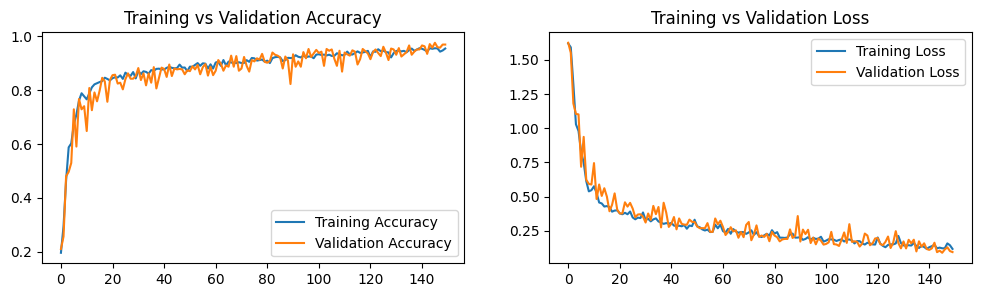

In [63]:
# Visualize the Acuuracy & Loss using Plots

plt.figure(figsize=(12, 3))

plt.subplot(1, 2, 1)
plt.plot(range(len(acc)), acc, label='Training Accuracy')
plt.plot(range(len(val_acc)), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training vs Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(len(loss)), loss, label='Training Loss')
plt.plot(range(len(val_loss)), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training vs Validation Loss')

### **Model Inference**

In [64]:
def text_extract_from_html(html_file):

    # Open and Read the HTML File
    with open(file=html_file, mode='r', encoding='utf-8') as file:
        html_content = file.read()

    # Parse the HTML Content
    soup = BeautifulSoup(html_content, 'html.parser')

    # Extract the Text
    text = soup.get_text()

    # Split the Text and Remove Unwanted Space
    result = [i.strip() for i in text.split()]

    return result

In [65]:
def text_processing(text):

    # spaCy Engine
    nlp = spacy.load('en_core_web_lg')

    # Process the Text with spaCy
    doc = nlp(' '.join(text))

    # Tokenization, Lemmatization, and Remove Stopwords, punctuation, digits
    token_list = [
                  token.lemma_.lower().strip()
                  for token in doc
                  if token.text.lower() not in nlp.Defaults.stop_words and token.text.isalpha()
                 ]

    if len(token_list) > 0:
        return ' '.join(token_list)
    else:
        return 'empty'

In [66]:
def sentence_embeddings(sentence):

    words = word_tokenize(sentence)                                     # split the sentence into separate words

    model = Word2Vec.load("word2vec_model.bin")                         # load the trained model

    vectors = [model.wv[word] for word in words if word in model.wv]    # get the vectors of each words

    if vectors:
        return np.mean(vectors, axis=0)                                 # return the average of vectors

    else:
        return np.zeros(model.vector_size)                              # we set the model parameter in training ---> vector_size = 300

In [70]:
def prediction(html_file):

    # Extract the Text from HTML Document
    extracted_text = text_extract_from_html(html_file)

    # Preprocess the Text
    preprocessed_text = text_processing(extracted_text)

    # Text Convert into Embeddings
    features = sentence_embeddings(preprocessed_text)

    # Reshape the features into match the expected input shape of Model
    features = np.expand_dims(features, axis=0)
    features = np.expand_dims(features, axis=2)

    # Convert into Tensors
    features_tensors = tf.convert_to_tensor(features, dtype=tf.float32)

    # Load the Model and Prediction
    model = tf.keras.models.load_model('model.h5')
    prediction = model.predict(features_tensors)

    # Find the Maximum Probability Value
    target_label = np.argmax(prediction)

    # Find the Target_Label Name
    target = {0:'Balance Sheets', 1:'Cash Flow', 2:'Income Statement', 3:'Notes', 4:'Others'}
    predicted_class = target[target_label]

    # Find the Confidence
    confidence = round(np.max(prediction)*100, 2)

    print(f'Predicted Class : {predicted_class}')
    print(f'Confidence : {confidence}%')

In [71]:
html_file = 'samples/balance_Sheets_sample.html'
prediction(html_file)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 507ms/step
Predicted Class : Balance Sheets
Confidence : 99.94%


In [72]:
html_file = 'samples/cash_flow_sample.html'
prediction(html_file)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 495ms/step
Predicted Class : Cash Flow
Confidence : 99.97%


In [73]:
html_file = 'samples/income_statement_sample.html'
prediction(html_file)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 482ms/step
Predicted Class : Income Statement
Confidence : 99.21%


In [74]:
html_file = 'samples/notes_sample.html'
prediction(html_file)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms/step
Predicted Class : Notes
Confidence : 98.49%


In [75]:
html_file = 'samples/others_sample.html'
prediction(html_file)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 475ms/step
Predicted Class : Others
Confidence : 91.21%
